In [36]:
import numpy as np
from numpy.random import default_rng
np.set_printoptions(precision=5, suppress=True)

In [37]:
import math

In [38]:
S0 = 100
r = 0.05
sigma = 0.2
T = 1.0
I = 10000


In [39]:
rng = default_rng(100)

In [40]:
ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * rng.standard_normal(I))

In [41]:
ST[:8].round(1)

array([ 81.7, 109.2, 120.5, 114.9,  85. , 127.7, 118.6, 118.6])

In [42]:
ST.mean()

np.float64(105.6675325917807)

In [43]:
S0 * math.exp(r * T)

105.12710963760242

In [44]:
from pylab import mpl, plt
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

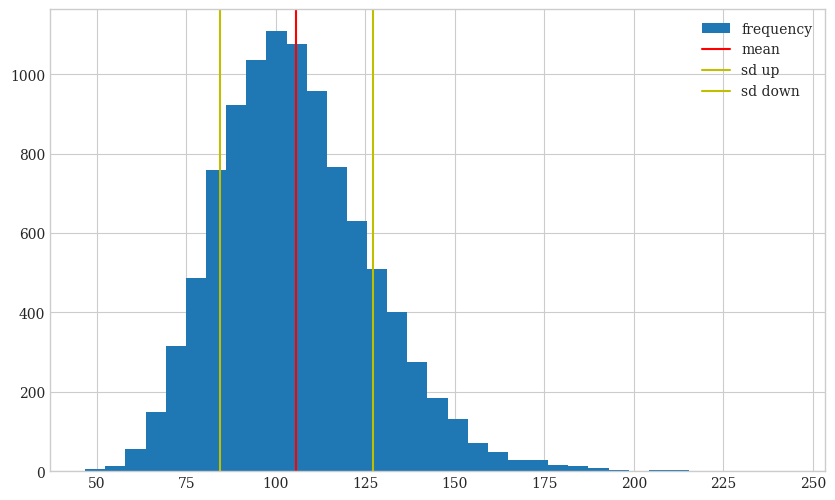

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(ST, bins=35, label='frequency')
plt.axvline(ST.mean(), color='r', label='mean')
plt.axvline(ST.mean() + ST.std(), color='y', label='sd up')
plt.axvline(ST.mean() - ST.std(), color = 'y', label = 'sd down')
plt.legend(loc = 0)

In [46]:
K = 105

In [47]:
CT = np.maximum(ST - K, 0)

In [48]:
CT[:8].round(1)

array([ 0. ,  4.2, 15.5,  9.9,  0. , 22.7, 13.6, 13.6])

In [49]:
C0 = math.exp(-r * T) * CT.mean()

In [50]:
C0

np.float64(8.288763195530931)

In [52]:
B0 = 100

In [53]:
M0 = np.array((B0, S0))

In [54]:
BT = B0 * np.ones(len(ST)) * math.exp(r * T)

In [55]:
BT[:4]

array([105.12710964, 105.12710964, 105.12710964, 105.12710964])

In [56]:
M = np.array((BT, ST)).T

In [57]:
M

array([[105.12710964,  81.74954603],
       [105.12710964, 109.19347911],
       [105.12710964, 120.46280099],
       ...,
       [105.12710964,  71.106244  ],
       [105.12710964, 105.32037868],
       [105.12710964, 134.77647299]], shape=(10000, 2))

In [58]:
phi = np.linalg.lstsq(M, CT, rcond=None)[0]

In [59]:
phi

array([-0.51089468,  0.59074549])

In [62]:
np.mean((np.dot(M, phi) - CT))

np.float64(3.073219545512984e-12)

In [61]:
np.dot(M0, phi)

np.float64(7.985080895188645)

In [63]:
M0 = np.array((100, 100))

In [65]:
r = 0.05
sigma = 0.2
lmbda = 0.3
mu = -0.3
delta = 0.1
rj = lmbda * (math.exp(mu + delta ** 2 / 2) - 1)
T = 1.0
I = 10000

In [66]:
BT = M0[0] * np.ones(I) * math.exp(r * T)

In [67]:
z = rng.standard_normal((2, I))
z -= z.mean()
z /= z.std()
y = rng.poisson(lmbda, I)

In [68]:
ST = S0 * (
    np.exp((r - rj - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * z[0] + (np.exp(mu + delta * z[1]) - 1) * y)
)

In [69]:
ST.mean() * math.exp(-r * T)

np.float64(100.86235512563601)

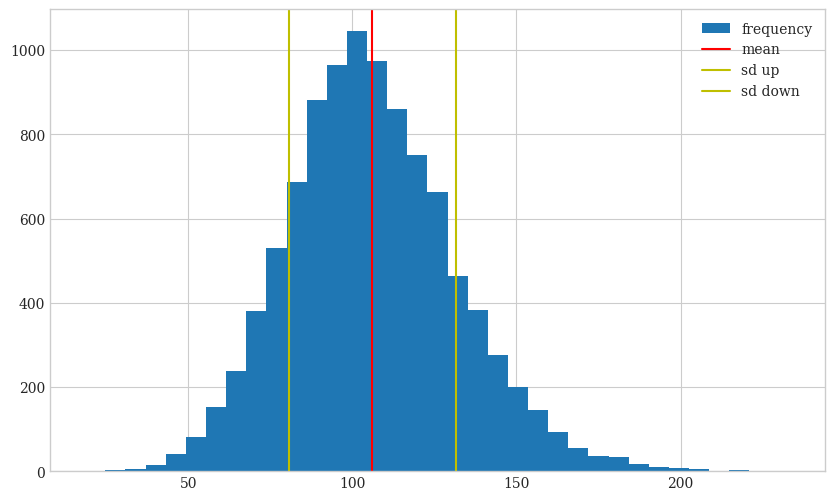

In [70]:
plt.figure(figsize=(10, 6))
plt.hist(ST, bins=35, label='frequency')
plt.axvline(ST.mean(), color='r', label='mean')
plt.axvline(ST.mean() + ST.std(), color='y', label='sd up')
plt.axvline(ST.mean() - ST.std(), color = 'y', label = 'sd down')
plt.legend(loc = 0)